# METİN ÖZETİ PROJESİ

### AHMET MUNGAN - 160255081

#### GetirYemek ve Yemeksepeti Restoran Temelli Yorumların Özeti

#### Github >>>> https://github.com/ahmetmungan

# 

#### Kütüphaneler

In [2]:
from bs4 import BeautifulSoup
import requests
from selenium import webdriver 
from selenium.webdriver.common.keys import Keys 
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from sklearn.cluster import KMeans
from sklearn.metrics import euclidean_distances
from sklearn.metrics import silhouette_samples, silhouette_score, davies_bouldin_score
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
import string
import nltk
from nltk.corpus import stopwords
import emoji
import re
import math

In [3]:
yorumlar = []
restoran_input = input("Restoran Adı: ")

Restoran Adı: pizza time keçiören pınarbaşı


#### GetirYemek Veri Toplama - Selenium Bot

In [4]:
soup_getiryemek = []
driver_path = "D:\setup\chromedriver.exe"
browser = webdriver.Chrome(driver_path)
browser.maximize_window()
browser.get("https://www.google.com.tr/")
entry = browser.find_element_by_css_selector(".gLFyf.gsfi")
entry.send_keys(restoran_input + " getir yemek")
time.sleep(2)
entry.send_keys(Keys.ENTER)
tikla = browser.find_element_by_css_selector(".LC20lb.MBeuO.DKV0Md")
tikla.click()
time.sleep(10)
tikla = browser.find_element_by_css_selector(".style__Title2-sc-__sc-1nwjacj-3.sGlqx.sc-7ff74b4c-1.eEhVlg")
tikla.click()
time.sleep(10)
soup_getiryemek.append(BeautifulSoup(browser.page_source, "html.parser"))
time.sleep(10)
browser.execute_script("window.scrollTo(0, document.body.scrollHeight);")
while(True):
    try:
        browser.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(10)
        tikla = browser.find_element_by_css_selector(".style__PageButton-sc-__sc-9kd8mo-2.style__NextButton-sc-__sc-9kd8mo-5.czKXyl")
        tikla.click()
        time.sleep(5)
        soup_getiryemek.append(BeautifulSoup(browser.page_source, "html.parser"))
        time.sleep(10)
    except:
        break
print("Sayfa Sayısı GetirYemek: ", len(soup_getiryemek))

Sayfa Sayısı GetirYemek:  5


In [56]:
yorum = []
yorum_getiryemek = []
for i in range(len(soup_getiryemek)):
    yorum.append(soup_getiryemek[i].find_all("span", attrs={"class":"sc-84b603ce-1 gkAiPN"}))
for j in range(len(yorum)):
    for k in range(len(yorum[j])):
        yorum_getiryemek.append(yorum[j][k].text)
for i in range(len(yorum_getiryemek)-1,-1,-1):
    if yorum_getiryemek[i] == '':
        yorum_getiryemek.pop(i)
len(yorum_getiryemek)

247

In [57]:
yorum_getiryemek

['teşekkürler ',
 'Muhteşem lezzet muhteşem boyut harika fiyat ',
 'Sıcak ve hızlıydı teşekkürler.',
 'Her zamanki gibi harika asla bozmadı teşekkürler ',
 'güzeldi beğendim elinize sağlık',
 'Büyük boy pizza bu kadarsa küçük boyu merak ediyorum. 😃',
 '15 dakikada geldi.kalın hamur istedim kalın geldi.geldiğinde sıcaktı. ketçap mayonez yoktu ama baharat karışımı vardı. lezzetliydi biz beğendik.',
 'Gerçekten mükemmeldi yapan ustanın getiren kuryenin ellerine sağlık ',
 'Misket köfte yoktu.',
 'buz gibi geldi ',
 'sufle biraz daha sıcak olsa guzel olur',
 'Pizza soğuk ulaştı. Kendimiz ısıttık.Biz tadını çok sevmedik. Belki bizim damak tadımıza uymamıştır. Yine de teşekkürler.',
 'soguktu ve geç geldi ayrıca barbekü sos yerine ketçap ve mayonezi karıştırıp koymanız takdire şayan gerçekten farkedilmeyecegini mi düşündünüz ',
 'Gerçekten çok güzeldi pizza tarafsız yorum yapıyorum çok lezzetliydi',
 'inanılmaz yavaş geliyor',
 'ince hamur secememe rağmen kalın ve tatsız bir hamur',
 'çok gü

#### Yemeksepeti Veri Toplama - Selenium Bot

In [6]:
soup_yemeksepeti = []
driver_path = "D:\setup\chromedriver.exe"
browser = webdriver.Chrome(driver_path)
browser.maximize_window()
browser.get("https://www.google.com.tr/")
entry = browser.find_element_by_css_selector(".gLFyf.gsfi")
entry.send_keys(restoran_input + " yemeksepeti")
time.sleep(2)
entry.send_keys(Keys.ENTER)
tikla = browser.find_element_by_css_selector(".LC20lb.MBeuO.DKV0Md")
tikla.click()
time.sleep(5)
tikla = browser.find_element_by_css_selector(".fl-interaction-primary")
tikla.click()
time.sleep(5)
tikla = browser.find_element_by_css_selector(".vendor-info-link.cl-interaction-primary.f-16.fw-light")
tikla.click()
time.sleep(5)
tikla = browser.find_element_by_css_selector(".box-flex.ratings-wrapper")
tikla.click()
time.sleep(5)
browser.execute_script("window.scrollTo(0, document.body.scrollHeight);")
time.sleep(5)
soup_yemeksepeti.append(BeautifulSoup(browser.page_source, "html.parser"))
print("Sayfa Sayısı Yemeksepeti: ", len(soup_yemeksepeti))

Sayfa Sayısı Yemeksepeti:  1


In [58]:
yorum_yemeksepeti = soup_yemeksepeti[0].text
restoran = soup_yemeksepeti[0].text.split(",")[0] + " tarafından verilen yanıt"
info = "Daha fazla bilgi al"
for i in range(len(yorum_yemeksepeti)):
    try:
        if yorum_yemeksepeti[i:i+len(info)] == info:
            info = i + len(info)
    except:
        pass    
yorum_yemeksepeti = yorum_yemeksepeti[info:-1]
yorum_yemeksepeti = yorum_yemeksepeti.split("/")
for i in range(len(yorum_yemeksepeti)):
    yorum_yemeksepeti[i] = yorum_yemeksepeti[i][12:-3]
for i in range(len(yorum_yemeksepeti),-1,-1):
    try:
        int(yorum_yemeksepeti[i][6:8])
        int(yorum_yemeksepeti[i][9:11])
        int(yorum_yemeksepeti[i][12:16])
        yorum_yemeksepeti.pop(i)
    except:
        pass
for i in range(len(yorum_yemeksepeti)):
    for j in range(len(yorum_yemeksepeti[i])):
        if yorum_yemeksepeti[i][j:j+len(restoran)] == restoran:
            yorum_yemeksepeti[i] = yorum_yemeksepeti[i][0:j]
for i in range(len(yorum_yemeksepeti)-1,-1,-1):
    if yorum_yemeksepeti[i] == '':
        yorum_yemeksepeti.pop(i)
len(yorum_yemeksepeti)

30

In [59]:
yorum_yemeksepeti

['Güzel değildi gecisitirme....z',
 'tek pizza aldığım firmadır kendileri başka pizza yemiyorum ancak bu sefer garip bişey oldu pizzanın altı yanmıştı kokuyodu hamuru sertleşmişti ilk defa böyle bi pizza yedim ...',
 'Her zman ki gibi herşey mükemmel....n',
 'Hem geç geldi,hem de soguk...',
 'harikaaaaaaaaaaaaaa..',
 'Yoğunluk varken siparişi kapatmayı öğrenememiş bir firma. 1 buçuk saat kurye bekledim, teknoloji devrindeyiz sitenin adını navigasyona yazınca nasıl gidileceği gösteriliyor. Buna rağmen dükkanın söylediğine göre kurye arkadaş yolu bulamamış. Dükkan arayıp pişkin pişkin adresi eksik yazmışsınız diyor....n',
 'Hamur çok kalındı. Secenekler arasına ince hamur eklerseniz daha iyi olur....r',
 '4 peynirliyi beğenmedim pek fakat meksika pizza çok güzeldi...',
 'Lezzetli ve hızlı servis...',
 'Herşey on numaraydı ben böyle pizza yemedim diyebilirim ama zile basmayın dememe rağmen zile basıp evdekileri uyandırması kuryenin hoş değil....',
 'Teşekkür ederim güzel olmuş....r',
 '19

#### Yemeksepeti ve GetirYemek Yorumlarının Birleştirilmesi

In [60]:
yorumlar = []
try:
    for i in range(len(yorum_yemeksepeti)):
        yorumlar.append([yorum_yemeksepeti[i]])
except:
    pass
try:
    for i in range(len(yorum_getiryemek)):
        yorumlar.append([yorum_getiryemek[i]])
except:
    pass
orijinal_yorumlar = yorumlar.copy()
print("Toplam Yorum Sayısı: ", len(yorumlar))
print("Orijinal Yorum Sayısı: ", len(orijinal_yorumlar))
yorumlar

Toplam Yorum Sayısı:  277
Orijinal Yorum Sayısı:  277


[['Güzel değildi gecisitirme....z'],
 ['tek pizza aldığım firmadır kendileri başka pizza yemiyorum ancak bu sefer garip bişey oldu pizzanın altı yanmıştı kokuyodu hamuru sertleşmişti ilk defa böyle bi pizza yedim ...'],
 ['Her zman ki gibi herşey mükemmel....n'],
 ['Hem geç geldi,hem de soguk...'],
 ['harikaaaaaaaaaaaaaa..'],
 ['Yoğunluk varken siparişi kapatmayı öğrenememiş bir firma. 1 buçuk saat kurye bekledim, teknoloji devrindeyiz sitenin adını navigasyona yazınca nasıl gidileceği gösteriliyor. Buna rağmen dükkanın söylediğine göre kurye arkadaş yolu bulamamış. Dükkan arayıp pişkin pişkin adresi eksik yazmışsınız diyor....n'],
 ['Hamur çok kalındı. Secenekler arasına ince hamur eklerseniz daha iyi olur....r'],
 ['4 peynirliyi beğenmedim pek fakat meksika pizza çok güzeldi...'],
 ['Lezzetli ve hızlı servis...'],
 ['Herşey on numaraydı ben böyle pizza yemedim diyebilirim ama zile basmayın dememe rağmen zile basıp evdekileri uyandırması kuryenin hoş değil....'],
 ['Teşekkür ederim gü

#### Emojilerin Silinmesi

In [61]:
emoji = re.compile("["
    u"\U0001F600-\U0001F64F"
    u"\U0001F300-\U0001F5FF"
    u"\U0001F680-\U0001F6FF"
    u"\U0001F1E0-\U0001F1FF"
    u"\U00002500-\U00002BEF"
    u"\U00002702-\U000027B0"
    u"\U00002702-\U000027B0"
    u"\U000024C2-\U0001F251"
    u"\U0001f926-\U0001f937"
    u"\U00010000-\U0010ffff"
    u"\u2640-\u2642" 
    u"\u2600-\u2B55"
    u"\u200d"
    u"\u23cf"
    u"\u23e9"
    u"\u231a"
    u"\ufe0f"
    u"\u3030"
                  "]+", re.UNICODE)
for i in range(len(yorumlar)):
    yorumlar[i][0] = re.sub(emoji, '', yorumlar[i][0])
yorumlar

[['Güzel değildi gecisitirme....z'],
 ['tek pizza aldığım firmadır kendileri başka pizza yemiyorum ancak bu sefer garip bişey oldu pizzanın altı yanmıştı kokuyodu hamuru sertleşmişti ilk defa böyle bi pizza yedim ...'],
 ['Her zman ki gibi herşey mükemmel....n'],
 ['Hem geç geldi,hem de soguk...'],
 ['harikaaaaaaaaaaaaaa..'],
 ['Yoğunluk varken siparişi kapatmayı öğrenememiş bir firma. 1 buçuk saat kurye bekledim, teknoloji devrindeyiz sitenin adını navigasyona yazınca nasıl gidileceği gösteriliyor. Buna rağmen dükkanın söylediğine göre kurye arkadaş yolu bulamamış. Dükkan arayıp pişkin pişkin adresi eksik yazmışsınız diyor....n'],
 ['Hamur çok kalındı. Secenekler arasına ince hamur eklerseniz daha iyi olur....r'],
 ['4 peynirliyi beğenmedim pek fakat meksika pizza çok güzeldi...'],
 ['Lezzetli ve hızlı servis...'],
 ['Herşey on numaraydı ben böyle pizza yemedim diyebilirim ama zile basmayın dememe rağmen zile basıp evdekileri uyandırması kuryenin hoş değil....'],
 ['Teşekkür ederim gü

#### Küçük Harf Dönüşümü

In [62]:
yorumlar_kucuk_harf = []
for yorum in yorumlar:
    yorum[0] = yorum[0].lower()
    yorumlar_kucuk_harf.append(yorum)
yorumlar = yorumlar_kucuk_harf
yorumlar

[['güzel değildi gecisitirme....z'],
 ['tek pizza aldığım firmadır kendileri başka pizza yemiyorum ancak bu sefer garip bişey oldu pizzanın altı yanmıştı kokuyodu hamuru sertleşmişti ilk defa böyle bi pizza yedim ...'],
 ['her zman ki gibi herşey mükemmel....n'],
 ['hem geç geldi,hem de soguk...'],
 ['harikaaaaaaaaaaaaaa..'],
 ['yoğunluk varken siparişi kapatmayı öğrenememiş bir firma. 1 buçuk saat kurye bekledim, teknoloji devrindeyiz sitenin adını navigasyona yazınca nasıl gidileceği gösteriliyor. buna rağmen dükkanın söylediğine göre kurye arkadaş yolu bulamamış. dükkan arayıp pişkin pişkin adresi eksik yazmışsınız diyor....n'],
 ['hamur çok kalındı. secenekler arasına ince hamur eklerseniz daha iyi olur....r'],
 ['4 peynirliyi beğenmedim pek fakat meksika pizza çok güzeldi...'],
 ['lezzetli ve hızlı servis...'],
 ['herşey on numaraydı ben böyle pizza yemedim diyebilirim ama zile basmayın dememe rağmen zile basıp evdekileri uyandırması kuryenin hoş değil....'],
 ['teşekkür ederim gü

#### Noktalama İşaretlerinin Silinmesi

In [63]:
yorumlarGecici = []
for yorum in yorumlar:
    yeniYorum = ""
    for harf in yorum[0]:
        if harf not in string.punctuation:
            yeniYorum += harf
    yorumlarGecici.append([yeniYorum])
yorumlar = yorumlarGecici
for i in range(len(yorumlar)):
    yorumlar[i][0] = yorumlar[i][0].strip()
dokuman = yorumlar.copy()
yorumlar

[['güzel değildi gecisitirmez'],
 ['tek pizza aldığım firmadır kendileri başka pizza yemiyorum ancak bu sefer garip bişey oldu pizzanın altı yanmıştı kokuyodu hamuru sertleşmişti ilk defa böyle bi pizza yedim'],
 ['her zman ki gibi herşey mükemmeln'],
 ['hem geç geldihem de soguk'],
 ['harikaaaaaaaaaaaaaa'],
 ['yoğunluk varken siparişi kapatmayı öğrenememiş bir firma 1 buçuk saat kurye bekledim teknoloji devrindeyiz sitenin adını navigasyona yazınca nasıl gidileceği gösteriliyor buna rağmen dükkanın söylediğine göre kurye arkadaş yolu bulamamış dükkan arayıp pişkin pişkin adresi eksik yazmışsınız diyorn'],
 ['hamur çok kalındı secenekler arasına ince hamur eklerseniz daha iyi olurr'],
 ['4 peynirliyi beğenmedim pek fakat meksika pizza çok güzeldi'],
 ['lezzetli ve hızlı servis'],
 ['herşey on numaraydı ben böyle pizza yemedim diyebilirim ama zile basmayın dememe rağmen zile basıp evdekileri uyandırması kuryenin hoş değil'],
 ['teşekkür ederim güzel olmuşr'],
 ['19 14 te verdiğim sipari

#### Tokenization İşlemi

In [64]:
kelimeler = []
gecici = []

In [65]:
for yorum in yorumlar:
    kelimeler.append(yorum[0].split())
print("Kelime Sayısı: ",len(kelimeler))
kelimeler

Kelime Sayısı:  277


[['güzel', 'değildi', 'gecisitirmez'],
 ['tek',
  'pizza',
  'aldığım',
  'firmadır',
  'kendileri',
  'başka',
  'pizza',
  'yemiyorum',
  'ancak',
  'bu',
  'sefer',
  'garip',
  'bişey',
  'oldu',
  'pizzanın',
  'altı',
  'yanmıştı',
  'kokuyodu',
  'hamuru',
  'sertleşmişti',
  'ilk',
  'defa',
  'böyle',
  'bi',
  'pizza',
  'yedim'],
 ['her', 'zman', 'ki', 'gibi', 'herşey', 'mükemmeln'],
 ['hem', 'geç', 'geldihem', 'de', 'soguk'],
 ['harikaaaaaaaaaaaaaa'],
 ['yoğunluk',
  'varken',
  'siparişi',
  'kapatmayı',
  'öğrenememiş',
  'bir',
  'firma',
  '1',
  'buçuk',
  'saat',
  'kurye',
  'bekledim',
  'teknoloji',
  'devrindeyiz',
  'sitenin',
  'adını',
  'navigasyona',
  'yazınca',
  'nasıl',
  'gidileceği',
  'gösteriliyor',
  'buna',
  'rağmen',
  'dükkanın',
  'söylediğine',
  'göre',
  'kurye',
  'arkadaş',
  'yolu',
  'bulamamış',
  'dükkan',
  'arayıp',
  'pişkin',
  'pişkin',
  'adresi',
  'eksik',
  'yazmışsınız',
  'diyorn'],
 ['hamur',
  'çok',
  'kalındı',
  'secenek

#### Durak Kelimelerin Silinmesi

In [85]:
sw = stopwords.words("turkish")
print("NLTK Türkçe Durak Kelime Sayısı: ", len(sw))
sw

NLTK Türkçe Durak Kelime Sayısı:  53


['acaba',
 'ama',
 'aslında',
 'az',
 'bazı',
 'belki',
 'biri',
 'birkaç',
 'birşey',
 'biz',
 'bu',
 'çok',
 'çünkü',
 'da',
 'daha',
 'de',
 'defa',
 'diye',
 'eğer',
 'en',
 'gibi',
 'hem',
 'hep',
 'hepsi',
 'her',
 'hiç',
 'için',
 'ile',
 'ise',
 'kez',
 'ki',
 'kim',
 'mı',
 'mu',
 'mü',
 'nasıl',
 'ne',
 'neden',
 'nerde',
 'nerede',
 'nereye',
 'niçin',
 'niye',
 'o',
 'sanki',
 'şey',
 'siz',
 'şu',
 'tüm',
 've',
 'veya',
 'ya',
 'yani']

In [86]:
sw_eklenecek = ["herşey","hersey","herkez","herkes","hah","heh","ney","cok","bazi","maalesef",
                "malesef","hic","nasil","aslinda","birkac","icin","nicin","sey","ıse","ıle","bırı",
                "belkı","dıye","eger","tum","cunku","cünkü","çunku","orda","orada","oradan","ordan",
                "burda","burdan","burada","buradan","şurada","şuradan","şurda","şurdan","surada",
                "suradan","surda","surdan","şurdaki","şuradaki","hayhay","evet","hayır","bir","bır",
                "iki","ıkı","üç","uc","dort","dört","bes","beş","altı","alti","yedi","yedı","sekiz",
                "sekız","dokuz","sıfır","sifir","0","1","2","3","4","5","6","7","8","9","fakat",
                "lakin","lakın","birisi","bisey","birde","bırde","bize","bize","ben","sen","bura",
                "buraya","şuraya","suraya","nere","neye","nesi","neyse","neyi","haha","bana","beni",
                "benim","onda","ondan","size","sizde","sizden","onlar","onlara","onlardan","ornegin",
                "onlarda","onların","sizdeki","şunu","şuna","suna","","şunda","şundan","sundan",
                "sunda","bunda","bundan","birkaçı","birkaci","bırkacı","bazilari","bazıları",
                "bazen","birden","bırden","peki","pekı","belli","bellı","besbelli","iyice","ıyıce",
                "kendi","kendince","kendı","diyor","dimi","dımı","hadi","haydi","hadı","haydı",
                "yanı","herkese","herkesten","herkesden","herkesi","herkeze","herkezten","anlık",
                "anlik","öyle","öylesine","oyle","oylesine","oylesıne","böyle","böylesine",
                "böylece","boyle","boylesine","boylesıne","gerçekten","gercekten","gerçi","gerci",
                "gercı","nitekim","netekim","deme","değilmi","degilmi","dahası","işte","ha","pek",
                "dün","dun","dek","bunu","değil","degil","arasında","arasinda","zannımca","sannımca",
                "arasından","arasına","arasıra","tarafından","tarafindan","hani","hanı","neredeyse",
                "nerdeyse","kimi","kime","kımı","kıme","kimde","kimisi","kımısı","kimden","onada",
                "bunada","şunada","sunada","beri","berı","berisi","berısı","berisinde","berısınde",
                "yakında","öte","ote","ötesinde","otesinde","otesınde","yada","derhal","öyleki",
                "öylece","oyleki","oylece","öylesine","oylesine","oylesıne","kadar","esas","asıl",
                "zira","zıra","keza","of","off","zaten","birçoğu","bircogu","bırcogu","biraz","bıraz",
                "bırkac","birtakım","birtakim","bırtakım","bırtakim","herhangi","herhangı","hangi",
                "hangı","hiçbir","hicbir","hıcbır","hiçbiri","hıçbırı","hicbiri","ola","halde","olaki",
                "olakı","ironi","ıronı","aması","amasi","idi","ıdı","yine","baya","bayağı","bayagi",
                "aa","üstelik","ustelik","ustelık","göre","gore","diğer","zannimca","sannimca",
                "diger","dıger","dığer","ancak","şeyler","seyler","bile","bıle","nedir","örneğin",
                "üstüne","üstlük","ustune","ustluk","sefer","falan","filan","fılan","artık","artik",
                "ayriyetten","ayrıyetten","bi","bı","hemde","a","zamanki","zamankı","hiçbirşey",
                "hicbirsey","hıcbırsey","hiçbirsey","be","gayet","dışında","disinda","dısında",
                "onu","ragmen","rağmen","şekilde","sekilde","sekılde","şekılde","şeklinde","seklinde",
                "sizinki","bizim","bızım","bizimki","bızımkı","onunki","onunkı","sadece","tamamen",
                "olarak","ayrıca","ayrica","öylelikle","oylelikle","oylelıkle","olabilir",
                "başka","baska","valla","vallaha","vallahi","vallahı","sankı","bence","sence","amk",
                "bizce","bızce","sizce","sızce","mudur","midir","mıdır","oldukça","oldukca","olduda",
                "mütemadiyen","mutemadiyen","varya","yokya","tabiki","olabılır", "tabıkı","ekseriyet",
                "ekseriyetle","ekserıyetle","ekserıyet","beyan","a","b","c","ç","d","e","f","g","ğ",
                "h","ı","i","j","k","l","m","n","o","ö","p","r","s","ş","t","u","ü","v","y","z",
                "miyim","mıyım","muyum","müyüm","mısın","misin","musun","müsün","bide","onun",
                "dahasi","mi","mı"]
sayilar = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
print("Eklenecek Durak Kelime Sayısı: ", len(sw_eklenecek))

Eklenecek Durak Kelime Sayısı:  423


In [87]:
for stopword in sw_eklenecek:
    sw.append(stopword)
print("Toplam Durak Kelime Sayısı: ", len(sw))

Toplam Durak Kelime Sayısı:  476


In [69]:
for i in range(len(kelimeler)):
    for j in range(len(kelimeler[i])-1,-1,-1):
        for stopword in sw:
            if stopword == kelimeler[i][j]:
                kelimeler[i].pop(j)
                break
for i in range(len(kelimeler)):
    for j in range(len(kelimeler[i])-1,-1,-1):
        for sayi in sayilar:
            if kelimeler[i][j].find(sayi, 0, len(kelimeler[i][j])) != -1:
                kelimeler[i].pop(j)
                break
for i in range(len(kelimeler)):
    for j in range(len(kelimeler[i])-1, -1, -1):
        if kelimeler[i][j][0] == "w":
            kelimeler[i].pop(j)
        elif kelimeler[i][j][0] == "x":
            kelimeler[i].pop(j)
        elif kelimeler[i][j][0] == "q":
            kelimeler[i].pop(j)
        elif kelimeler[i][j][0] == "ğ":
            kelimeler[i].pop(j)
for i in range(len(kelimeler)-1,-1,-1):
    if kelimeler[i] == []:
        kelimeler.pop(i)
        orijinal_yorumlar.pop(i)
print(len(orijinal_yorumlar), " ", len(kelimeler))
kelimeler

277   277


[['güzel', 'değildi', 'gecisitirmez'],
 ['tek',
  'pizza',
  'aldığım',
  'firmadır',
  'kendileri',
  'pizza',
  'yemiyorum',
  'garip',
  'bişey',
  'oldu',
  'pizzanın',
  'yanmıştı',
  'kokuyodu',
  'hamuru',
  'sertleşmişti',
  'ilk',
  'pizza',
  'yedim'],
 ['zman', 'mükemmeln'],
 ['geç', 'geldihem', 'soguk'],
 ['harikaaaaaaaaaaaaaa'],
 ['yoğunluk',
  'varken',
  'siparişi',
  'kapatmayı',
  'öğrenememiş',
  'firma',
  'buçuk',
  'saat',
  'kurye',
  'bekledim',
  'teknoloji',
  'devrindeyiz',
  'sitenin',
  'adını',
  'navigasyona',
  'yazınca',
  'gidileceği',
  'gösteriliyor',
  'buna',
  'dükkanın',
  'söylediğine',
  'kurye',
  'arkadaş',
  'yolu',
  'bulamamış',
  'dükkan',
  'arayıp',
  'pişkin',
  'pişkin',
  'adresi',
  'eksik',
  'yazmışsınız',
  'diyorn'],
 ['hamur',
  'kalındı',
  'secenekler',
  'ince',
  'hamur',
  'eklerseniz',
  'iyi',
  'olurr'],
 ['peynirliyi', 'beğenmedim', 'meksika', 'pizza', 'güzeldi'],
 ['lezzetli', 'hızlı', 'servis'],
 ['on',
  'numaraydı',

#### Çoğul Eklerin (-ler,-lar,-leri,-ları vb.) Temizlenmesi

In [70]:
cokluk_ekleri = ["ler","lar"]
for i in range(len(kelimeler)):
    for m in range(len(kelimeler[i])):
        for j in cokluk_ekleri:
            try:
                for k in range(len(kelimeler[i])-2):
                    if kelimeler[i][m][-k] + kelimeler[i][m][-(k-1)] + kelimeler[i][m][-(k-2)] == j:
                        kelimeler[i][m] = kelimeler[i][m][0:-k]
                        break
            except:
                pass
kelimeler

[['güzel', 'değildi', 'gecisitirmez'],
 ['tek',
  'pizza',
  'aldığım',
  'firmadır',
  'kendi',
  'pizza',
  'yemiyorum',
  'garip',
  'bişey',
  'oldu',
  'pizzanın',
  'yanmıştı',
  'kokuyodu',
  'hamuru',
  'sertleşmişti',
  'ilk',
  'pizza',
  'yedim'],
 ['zman', 'mükemmeln'],
 ['geç', 'geldihem', 'soguk'],
 ['harikaaaaaaaaaaaaaa'],
 ['yoğunluk',
  'varken',
  'siparişi',
  'kapatmayı',
  'öğrenememiş',
  'firma',
  'buçuk',
  'saat',
  'kurye',
  'bekledim',
  'teknoloji',
  'devrindeyiz',
  'sitenin',
  'adını',
  'navigasyona',
  'yazınca',
  'gidileceği',
  'gösteriliyor',
  'buna',
  'dükkanın',
  'söylediğine',
  'kurye',
  'arkadaş',
  'yolu',
  'bulamamış',
  'dükkan',
  'arayıp',
  'pişkin',
  'pişkin',
  'adresi',
  'eksik',
  'yazmışsınız',
  'diyorn'],
 ['hamur',
  'kalındı',
  'secenek',
  'ince',
  'hamur',
  'eklerseniz',
  'iyi',
  'olurr'],
 ['peynirliyi', 'beğenmedim', 'meksika', 'pizza', 'güzeldi'],
 ['lezzetli', 'hızlı', 'servis'],
 ['on',
  'numaraydı',
  'piz

#### -miş, -mişlik, -mıştı, -mişti, -ydı, -ydi vb. eklerin silinmesi/değiştirilmesi

In [71]:
for i in range(len(kelimeler)):
    for j in range(len(kelimeler[i])):
        sozluk = open("sozluk/{}.txt".format(kelimeler[i][j][0]), encoding = 'utf-8', mode = 'r').read().split('\n')
        if len(kelimeler[i][j]) > 6:
            if kelimeler[i][j][-3] + kelimeler[i][j][-2] + kelimeler[i][j][-1] == "miş":
                if kelimeler[i][j][0:-3] in sozluk:
                    kelimeler[i][j] = kelimeler[i][j][0:-3]
                elif kelimeler[i][j][0:-3]+"me" in sozluk:
                    kelimeler[i][j] = kelimeler[i][j][0:-3]+"me"
        if len(kelimeler[i][j]) > 9:
            if kelimeler[i][j][-6]+kelimeler[i][j][-5]+kelimeler[i][j][-4]+kelimeler[i][j][-3]+kelimeler[i][j][-2]+kelimeler[i][j][-1] == "mişlik":
                if kelimeler[i][j][0:-6] in sozluk:
                    kelimeler[i][j] = kelimeler[i][j][0:-6]
                elif kelimeler[i][j][0:-6]+"me" in sozluk:
                    kelimeler[i][j] = kelimeler[i][j][0:-6]+"me"
        #----Duyulan Geçmiş Zaman Eki + Yapım Eki----
        if len(kelimeler[i][j]) > 6:
            if kelimeler[i][j][-3] + kelimeler[i][j][-2] + kelimeler[i][j][-1] == "mış":
                if kelimeler[i][j][0:-3] in sozluk:
                    kelimeler[i][j] = kelimeler[i][j][0:-3]
                elif kelimeler[i][j][0:-3]+"ma" in sozluk:
                    kelimeler[i][j] = kelimeler[i][j][0:-3]+"ma"
        if len(kelimeler[i][j]) > 9:
            if kelimeler[i][j][-6]+kelimeler[i][j][-5]+kelimeler[i][j][-4]+kelimeler[i][j][-3]+kelimeler[i][j][-2]+kelimeler[i][j][-1] == "mışlık":
                if kelimeler[i][j][0:-6] in sozluk:
                    kelimeler[i][j] = kelimeler[i][j][0:-6]
                elif kelimeler[i][j][0:-6]+"ma" in sozluk:
                    kelimeler[i][j] = kelimeler[i][j][0:-6]+"ma"
        #----Duyulan Geçmiş Zaman Eki + Yapım Eki----
        if len(kelimeler[i][j]) > 6:
            if kelimeler[i][j][-3] + kelimeler[i][j][-2] + kelimeler[i][j][-1] == "muş":
                if kelimeler[i][j][0:-3] in sozluk:
                    kelimeler[i][j] = kelimeler[i][j][0:-3]
                elif kelimeler[i][j][0:-3]+"ma" in sozluk:
                    kelimeler[i][j] = kelimeler[i][j][0:-3]+"ma"
        if len(kelimeler[i][j]) > 9:
            if kelimeler[i][j][-6]+kelimeler[i][j][-5]+kelimeler[i][j][-4]+kelimeler[i][j][-3]+kelimeler[i][j][-2]+kelimeler[i][j][-1] == "muşluk":
                if kelimeler[i][j][0:-6] in sozluk:
                    kelimeler[i][j] = kelimeler[i][j][0:-6]
                elif kelimeler[i][j][0:-6]+"ma" in sozluk:
                    kelimeler[i][j] = kelimeler[i][j][0:-6]+"ma"
        #----Duyulan Geçmiş Zaman Eki + Yapım Eki----
        if len(kelimeler[i][j]) > 6:
            if kelimeler[i][j][-3] + kelimeler[i][j][-2] + kelimeler[i][j][-1] == "müş":
                if kelimeler[i][j][0:-3] in sozluk:
                    kelimeler[i][j] = kelimeler[i][j][0:-3]
                elif kelimeler[i][j][0:-3]+"me" in sozluk:
                    kelimeler[i][j] = kelimeler[i][j][0:-3]+"me"
        if len(kelimeler[i][j]) > 9:
            if kelimeler[i][j][-6]+kelimeler[i][j][-5]+kelimeler[i][j][-4]+kelimeler[i][j][-3]+kelimeler[i][j][-2]+kelimeler[i][-1] == "müşlük":
                if kelimeler[i][j][0:-6] in sozluk:
                    kelimeler[i][j] = kelimeler[i][j][0:-6]
                elif kelimeler[i][j][0:-6]+"me" in sozluk:
                    kelimeler[i][j] = kelimeler[i][j][0:-6]+"me"
        #----Duyulan Geçmiş Zaman Eki + Ek-fiil Eki----
        if len(kelimeler[i][j]) > 8:
            if kelimeler[i][j][-5]+kelimeler[i][j][-4]+kelimeler[i][j][-3]+kelimeler[i][j][-2]+kelimeler[i][-1] == "müştü":
                if kelimeler[i][j][0:-5] in sozluk:
                    kelimeler[i][j] = kelimeler[i][j][0:-5]
                elif kelimeler[i][j][0:-5]+"me" in sozluk:
                    kelimeler[i][j] = kelimeler[i][j][0:-5]+"me"
        if len(kelimeler[i][j]) > 8:
            if kelimeler[i][j][-5]+kelimeler[i][j][-4]+kelimeler[i][j][-3]+kelimeler[i][j][-2]+kelimeler[i][-1] == "muştu":
                if kelimeler[i][j][0:-5] in sozluk:
                    kelimeler[i][j] = kelimeler[i][j][0:-5]
                elif kelimeler[i][j][0:-5]+"ma" in sozluk:
                    kelimeler[i][j] = kelimeler[i][j][0:-5]+"ma"
        if len(kelimeler[i][j]) > 8:
            if kelimeler[i][j][-5]+kelimeler[i][j][-4]+kelimeler[i][j][-3]+kelimeler[i][j][-2]+kelimeler[i][-1] == "mıştı":
                if kelimeler[i][j][0:-5] in sozluk:
                    kelimeler[i][j] = kelimeler[i][j][0:-5]
                elif kelimeler[i][j][0:-5]+"ma" in sozluk:
                    kelimeler[i][j] = kelimeler[i][j][0:-5]+"ma"
        if len(kelimeler[i][j]) > 8:
            if kelimeler[i][j][-5]+kelimeler[i][j][-4]+kelimeler[i][j][-3]+kelimeler[i][j][-2]+kelimeler[i][-1] == "mişti":
                if kelimeler[i][j][0:-5] in sozluk:
                    kelimeler[i][j] = kelimeler[i][j][0:-5]
                elif kelimeler[i][j][0:-5]+"me" in sozluk:
                    kelimeler[i][j] = kelimeler[i][j][0:-5]+"me"
        #----Aitlik Birleşmiş Eki----
        if len(kelimeler[i][j]) > 7:
            if kelimeler[i][j][-3]+kelimeler[i][j][-2]+kelimeler[i][-1] == "ydı":
                if kelimeler[i][j][0:-3] in sozluk:
                    kelimeler[i][j] = kelimeler[i][j][0:-3]
                elif kelimeler[i][j][0:-3] in sozluk:
                    kelimeler[i][j] = kelimeler[i][j][0:-3]
        if len(kelimeler[i][j]) > 7:
            if kelimeler[i][j][-3]+kelimeler[i][j][-2]+kelimeler[i][-1] == "ydi":
                if kelimeler[i][j][0:-3] in sozluk:
                    kelimeler[i][j] = kelimeler[i][j][0:-3]
                elif kelimeler[i][j][0:-3] in sozluk:
                    kelimeler[i][j] = kelimeler[i][j][0:-3]
kelimeler

[['güzel', 'değildi', 'gecisitirmez'],
 ['tek',
  'pizza',
  'aldığım',
  'firmadır',
  'kendi',
  'pizza',
  'yemiyorum',
  'garip',
  'bişey',
  'oldu',
  'pizzanın',
  'yanmıştı',
  'kokuyodu',
  'hamuru',
  'sertleşmişti',
  'ilk',
  'pizza',
  'yedim'],
 ['zman', 'mükemmeln'],
 ['geç', 'geldihem', 'soguk'],
 ['harikaaaaaaaaaaaaaa'],
 ['yoğunluk',
  'varken',
  'siparişi',
  'kapatmayı',
  'öğrenememiş',
  'firma',
  'buçuk',
  'saat',
  'kurye',
  'bekledim',
  'teknoloji',
  'devrindeyiz',
  'sitenin',
  'adını',
  'navigasyona',
  'yazınca',
  'gidileceği',
  'gösteriliyor',
  'buna',
  'dükkanın',
  'söylediğine',
  'kurye',
  'arkadaş',
  'yolu',
  'bulama',
  'dükkan',
  'arayıp',
  'pişkin',
  'pişkin',
  'adresi',
  'eksik',
  'yazmışsınız',
  'diyorn'],
 ['hamur',
  'kalındı',
  'secenek',
  'ince',
  'hamur',
  'eklerseniz',
  'iyi',
  'olurr'],
 ['peynirliyi', 'beğenmedim', 'meksika', 'pizza', 'güzeldi'],
 ['lezzetli', 'hızlı', 'servis'],
 ['on',
  'numaraydı',
  'pizza'

#### -ki ekinin anlamsız olanlarının silinmesi

In [72]:
for i in range(len(kelimeler)):
    for j in range(len(kelimeler[i])):
        sozluk = open("sozluk/{}.txt".format(kelimeler[i][j][0]), encoding = 'utf-8', mode = 'r').read().split('\n')
        if len(kelimeler[i][j]) > 4:
            if kelimeler[i][j][-2] + kelimeler[i][j][-1] == "ki":
                if kelimeler[i][j][0:-1] in sozluk:
                    kelimeler[i][j] = kelimeler[i][j][0:-1]
                elif kelimeler[i][j][0:-2] in sozluk:
                    kelimeler[i][j] = kelimeler[i][j][0:-2]
kelimeler

[['güzel', 'değildi', 'gecisitirmez'],
 ['tek',
  'pizza',
  'aldığım',
  'firmadır',
  'kendi',
  'pizza',
  'yemiyorum',
  'garip',
  'bişey',
  'oldu',
  'pizzanın',
  'yanmıştı',
  'kokuyodu',
  'hamuru',
  'sertleşmişti',
  'ilk',
  'pizza',
  'yedim'],
 ['zman', 'mükemmeln'],
 ['geç', 'geldihem', 'soguk'],
 ['harikaaaaaaaaaaaaaa'],
 ['yoğunluk',
  'varken',
  'siparişi',
  'kapatmayı',
  'öğrenememiş',
  'firma',
  'buçuk',
  'saat',
  'kurye',
  'bekledim',
  'teknoloji',
  'devrindeyiz',
  'sitenin',
  'adını',
  'navigasyona',
  'yazınca',
  'gidileceği',
  'gösteriliyor',
  'buna',
  'dükkanın',
  'söylediğine',
  'kurye',
  'arkadaş',
  'yolu',
  'bulama',
  'dükkan',
  'arayıp',
  'pişkin',
  'pişkin',
  'adresi',
  'eksik',
  'yazmışsınız',
  'diyorn'],
 ['hamur',
  'kalındı',
  'secenek',
  'ince',
  'hamur',
  'eklerseniz',
  'iyi',
  'olurr'],
 ['peynirliyi', 'beğenmedim', 'meksika', 'pizza', 'güzeldi'],
 ['lezzetli', 'hızlı', 'servis'],
 ['on',
  'numaraydı',
  'pizza'

#### -sal ekinin anlamsız olanlarının silinmesi

In [73]:
for i in range(len(kelimeler)):
    for j in range(len(kelimeler[i])):
        sozluk = open("sozluk/{}.txt".format(kelimeler[i][j][0]), encoding = 'utf-8', mode = 'r').read().split('\n')
        if len(kelimeler[i][j]) > 5:
            if kelimeler[i][j][-3] + kelimeler[i][j][-2] + kelimeler[i][j][-1] == "sal":
                if kelimeler[i][j][0:-3] in sozluk:
                    kelimeler[i][j] = kelimeler[i][j][0:-3]
kelimeler

[['güzel', 'değildi', 'gecisitirmez'],
 ['tek',
  'pizza',
  'aldığım',
  'firmadır',
  'kendi',
  'pizza',
  'yemiyorum',
  'garip',
  'bişey',
  'oldu',
  'pizzanın',
  'yanmıştı',
  'kokuyodu',
  'hamuru',
  'sertleşmişti',
  'ilk',
  'pizza',
  'yedim'],
 ['zman', 'mükemmeln'],
 ['geç', 'geldihem', 'soguk'],
 ['harikaaaaaaaaaaaaaa'],
 ['yoğunluk',
  'varken',
  'siparişi',
  'kapatmayı',
  'öğrenememiş',
  'firma',
  'buçuk',
  'saat',
  'kurye',
  'bekledim',
  'teknoloji',
  'devrindeyiz',
  'sitenin',
  'adını',
  'navigasyona',
  'yazınca',
  'gidileceği',
  'gösteriliyor',
  'buna',
  'dükkanın',
  'söylediğine',
  'kurye',
  'arkadaş',
  'yolu',
  'bulama',
  'dükkan',
  'arayıp',
  'pişkin',
  'pişkin',
  'adresi',
  'eksik',
  'yazmışsınız',
  'diyorn'],
 ['hamur',
  'kalındı',
  'secenek',
  'ince',
  'hamur',
  'eklerseniz',
  'iyi',
  'olurr'],
 ['peynirliyi', 'beğenmedim', 'meksika', 'pizza', 'güzeldi'],
 ['lezzetli', 'hızlı', 'servis'],
 ['on',
  'numaraydı',
  'pizza'

#### -deki -daki eklerinin anlama göre silinmesi/değiştirilmesi

In [74]:
for i in range(len(kelimeler)):
    for j in range(len(kelimeler[i])):
        sozluk = open("sozluk/{}.txt".format(kelimeler[i][j][0]), encoding = 'utf-8', mode = 'r').read().split('\n')
        if len(kelimeler[i][j]) > 5:
            if kelimeler[i][j][-4] + kelimeler[i][j][-3] + kelimeler[i][j][-2] + kelimeler[i][j][-1] == "deki" or kelimeler[i][j][-4] + kelimeler[i][j][-3] + kelimeler[i][j][-2] + kelimeler[i][j][-1] == "daki":
                if kelimeler[i][j][0:-4] in sozluk:
                    kelimeler[i][j] = kelimeler[i][j][0:-4]
kelimeler

[['güzel', 'değildi', 'gecisitirmez'],
 ['tek',
  'pizza',
  'aldığım',
  'firmadır',
  'kendi',
  'pizza',
  'yemiyorum',
  'garip',
  'bişey',
  'oldu',
  'pizzanın',
  'yanmıştı',
  'kokuyodu',
  'hamuru',
  'sertleşmişti',
  'ilk',
  'pizza',
  'yedim'],
 ['zman', 'mükemmeln'],
 ['geç', 'geldihem', 'soguk'],
 ['harikaaaaaaaaaaaaaa'],
 ['yoğunluk',
  'varken',
  'siparişi',
  'kapatmayı',
  'öğrenememiş',
  'firma',
  'buçuk',
  'saat',
  'kurye',
  'bekledim',
  'teknoloji',
  'devrindeyiz',
  'sitenin',
  'adını',
  'navigasyona',
  'yazınca',
  'gidileceği',
  'gösteriliyor',
  'buna',
  'dükkanın',
  'söylediğine',
  'kurye',
  'arkadaş',
  'yolu',
  'bulama',
  'dükkan',
  'arayıp',
  'pişkin',
  'pişkin',
  'adresi',
  'eksik',
  'yazmışsınız',
  'diyorn'],
 ['hamur',
  'kalındı',
  'secenek',
  'ince',
  'hamur',
  'eklerseniz',
  'iyi',
  'olurr'],
 ['peynirliyi', 'beğenmedim', 'meksika', 'pizza', 'güzeldi'],
 ['lezzetli', 'hızlı', 'servis'],
 ['on',
  'numaraydı',
  'pizza'

#### -meli -malı eklerinin anlamı bozmadan değiştirilmesi/silinmesi

In [75]:
for i in range(len(kelimeler)):
    for j in range(len(kelimeler[i])):
        sozluk = open("sozluk/{}.txt".format(kelimeler[i][j][0]), encoding = 'utf-8', mode = 'r').read().split('\n')
        if len(kelimeler[i][j]) > 5:
            if kelimeler[i][j][-4] + kelimeler[i][j][-3] + kelimeler[i][j][-2] + kelimeler[i][j][-1] == "meli" or kelimeler[i][j][-4] + kelimeler[i][j][-3] + kelimeler[i][j][-2] + kelimeler[i][j][-1] == "malı":
                if kelimeler[i][j][0:-2] + "k" in sozluk:
                    kelimeler[i][j] = kelimeler[i][j][0:-2] + "k"
                elif kelimeler[i][j][0:-2] in sozluk:
                    kelimeler[i][j] = kelimeler[i][j][0:-2]
                elif kelimeler[i][j][0:-4] in sozluk:
                    kelimeler[i][j] = kelimeler[i][j][0:-4]
kelimeler

[['güzel', 'değildi', 'gecisitirmez'],
 ['tek',
  'pizza',
  'aldığım',
  'firmadır',
  'kendi',
  'pizza',
  'yemiyorum',
  'garip',
  'bişey',
  'oldu',
  'pizzanın',
  'yanmıştı',
  'kokuyodu',
  'hamuru',
  'sertleşmişti',
  'ilk',
  'pizza',
  'yedim'],
 ['zman', 'mükemmeln'],
 ['geç', 'geldihem', 'soguk'],
 ['harikaaaaaaaaaaaaaa'],
 ['yoğunluk',
  'varken',
  'siparişi',
  'kapatmayı',
  'öğrenememiş',
  'firma',
  'buçuk',
  'saat',
  'kurye',
  'bekledim',
  'teknoloji',
  'devrindeyiz',
  'sitenin',
  'adını',
  'navigasyona',
  'yazınca',
  'gidileceği',
  'gösteriliyor',
  'buna',
  'dükkanın',
  'söylediğine',
  'kurye',
  'arkadaş',
  'yolu',
  'bulama',
  'dükkan',
  'arayıp',
  'pişkin',
  'pişkin',
  'adresi',
  'eksik',
  'yazmışsınız',
  'diyorn'],
 ['hamur',
  'kalındı',
  'secenek',
  'ince',
  'hamur',
  'eklerseniz',
  'iyi',
  'olurr'],
 ['peynirliyi', 'beğenmedim', 'meksika', 'pizza', 'güzeldi'],
 ['lezzetli', 'hızlı', 'servis'],
 ['on',
  'numaraydı',
  'pizza'

#### -nden -ndan ikinci veya üçüncü tekil şahıs eki + ayrılma eki anlama göre silinmesi

In [76]:
for i in range(len(kelimeler)):
    for j in range(len(kelimeler[i])):
        sozluk = open("sozluk/{}.txt".format(kelimeler[i][j][0]), encoding = 'utf-8', mode = 'r').read().split('\n')
        if len(kelimeler[i][j]) > 6:
            if kelimeler[i][j][-4] + kelimeler[i][j][-3] + kelimeler[i][j][-2] + kelimeler[i][j][-1] == "nden" or kelimeler[i][j][-4] + kelimeler[i][j][-3] + kelimeler[i][j][-2] + kelimeler[i][j][-1] == "ndan":
                if kelimeler[i][j][0:-4] in sozluk:
                    kelimeler[i][j] = kelimeler[i][j][0:-4]
            elif kelimeler[i][j][-3] + kelimeler[i][j][-2] + kelimeler[i][j][-1] == "den" or kelimeler[i][j][-3] + kelimeler[i][j][-2] + kelimeler[i][j][-1] == "dan":
                if kelimeler[i][j][0:-3] in sozluk:
                    kelimeler[i][j] = kelimeler[i][j][0:-3]
                elif kelimeler[i][j][0:-1] in sozluk:
                    kelimeler[i][j] = kelimeler[i][j][0:-1]
kelimeler

[['güzel', 'değildi', 'gecisitirmez'],
 ['tek',
  'pizza',
  'aldığım',
  'firmadır',
  'kendi',
  'pizza',
  'yemiyorum',
  'garip',
  'bişey',
  'oldu',
  'pizzanın',
  'yanmıştı',
  'kokuyodu',
  'hamuru',
  'sertleşmişti',
  'ilk',
  'pizza',
  'yedim'],
 ['zman', 'mükemmeln'],
 ['geç', 'geldihem', 'soguk'],
 ['harikaaaaaaaaaaaaaa'],
 ['yoğunluk',
  'varken',
  'siparişi',
  'kapatmayı',
  'öğrenememiş',
  'firma',
  'buçuk',
  'saat',
  'kurye',
  'bekledim',
  'teknoloji',
  'devrindeyiz',
  'sitenin',
  'adını',
  'navigasyona',
  'yazınca',
  'gidileceği',
  'gösteriliyor',
  'buna',
  'dükkanın',
  'söylediğine',
  'kurye',
  'arkadaş',
  'yolu',
  'bulama',
  'dükkan',
  'arayıp',
  'pişkin',
  'pişkin',
  'adresi',
  'eksik',
  'yazmışsınız',
  'diyorn'],
 ['hamur',
  'kalındı',
  'secenek',
  'ince',
  'hamur',
  'eklerseniz',
  'iyi',
  'olurr'],
 ['peynirliyi', 'beğenmedim', 'meksika', 'pizza', 'güzeldi'],
 ['lezzetli', 'hızlı', 'servis'],
 ['on',
  'numaraydı',
  'pizza'

#### -te -ta sertleşmiş bulunma halinin anlamına göre silinmesi

In [77]:
for i in range(len(kelimeler)):
    for j in range(len(kelimeler[i])):
        sozluk = open("sozluk/{}.txt".format(kelimeler[i][j][0]), encoding = 'utf-8', mode = 'r').read().split('\n')
        if len(kelimeler[i][j]) > 5:
            if kelimeler[i][j][-2] + kelimeler[i][j][-1] == "ta" or kelimeler[i][j][-2] + kelimeler[i][j][-1] == "te":
                if kelimeler[i][j][0:-1] in sozluk:
                    kelimeler[i][j] = kelimeler[i][j][0:-1]
                elif kelimeler[i][j][0:-2] in sozluk:
                    kelimeler[i][j] = kelimeler[i][j][0:-2]
kelimeler

[['güzel', 'değildi', 'gecisitirmez'],
 ['tek',
  'pizza',
  'aldığım',
  'firmadır',
  'kendi',
  'pizza',
  'yemiyorum',
  'garip',
  'bişey',
  'oldu',
  'pizzanın',
  'yanmıştı',
  'kokuyodu',
  'hamuru',
  'sertleşmişti',
  'ilk',
  'pizza',
  'yedim'],
 ['zman', 'mükemmeln'],
 ['geç', 'geldihem', 'soguk'],
 ['harikaaaaaaaaaaaaaa'],
 ['yoğunluk',
  'varken',
  'siparişi',
  'kapatmayı',
  'öğrenememiş',
  'firma',
  'buçuk',
  'saat',
  'kurye',
  'bekledim',
  'teknoloji',
  'devrindeyiz',
  'sitenin',
  'adını',
  'navigasyona',
  'yazınca',
  'gidileceği',
  'gösteriliyor',
  'buna',
  'dükkanın',
  'söylediğine',
  'kurye',
  'arkadaş',
  'yolu',
  'bulama',
  'dükkan',
  'arayıp',
  'pişkin',
  'pişkin',
  'adresi',
  'eksik',
  'yazmışsınız',
  'diyorn'],
 ['hamur',
  'kalındı',
  'secenek',
  'ince',
  'hamur',
  'eklerseniz',
  'iyi',
  'olurr'],
 ['peynirliyi', 'beğenmedim', 'meksika', 'pizza', 'güzeldi'],
 ['lezzetli', 'hızlı', 'servis'],
 ['on',
  'numaraydı',
  'pizza'

#### -ce -ca eşitlik eki silinmesi (anlam değişimi yüksek)

In [78]:
for i in range(len(kelimeler)):
    for j in range(len(kelimeler[i])):
        sozluk = open("sozluk/{}.txt".format(kelimeler[i][j][0]), encoding = 'utf-8', mode = 'r').read().split('\n')
        if len(kelimeler[i][j]) > 5:
            if kelimeler[i][j][-2] + kelimeler[i][j][-1] == "ca" or kelimeler[i][j][-2] + kelimeler[i][j][-1] == "ce":
                if kelimeler[i][j][0:-2] in sozluk:
                    kelimeler[i][j] = kelimeler[i][j][0:-2]
kelimeler

[['güzel', 'değildi', 'gecisitirmez'],
 ['tek',
  'pizza',
  'aldığım',
  'firmadır',
  'kendi',
  'pizza',
  'yemiyorum',
  'garip',
  'bişey',
  'oldu',
  'pizzanın',
  'yanmıştı',
  'kokuyodu',
  'hamuru',
  'sertleşmişti',
  'ilk',
  'pizza',
  'yedim'],
 ['zman', 'mükemmeln'],
 ['geç', 'geldihem', 'soguk'],
 ['harikaaaaaaaaaaaaaa'],
 ['yoğunluk',
  'varken',
  'siparişi',
  'kapatmayı',
  'öğrenememiş',
  'firma',
  'buçuk',
  'saat',
  'kurye',
  'bekledim',
  'teknoloji',
  'devrindeyiz',
  'sitenin',
  'adını',
  'navigasyona',
  'yazın',
  'gidileceği',
  'gösteriliyor',
  'buna',
  'dükkanın',
  'söylediğine',
  'kurye',
  'arkadaş',
  'yolu',
  'bulama',
  'dükkan',
  'arayıp',
  'pişkin',
  'pişkin',
  'adresi',
  'eksik',
  'yazmışsınız',
  'diyorn'],
 ['hamur',
  'kalındı',
  'secenek',
  'ince',
  'hamur',
  'eklerseniz',
  'iyi',
  'olurr'],
 ['peynirliyi', 'beğenmedim', 'meksika', 'pizza', 'güzeldi'],
 ['lezzetli', 'hızlı', 'servis'],
 ['on',
  'numaraydı',
  'pizza',


#### -çe -ça sert eşitlik eki silinmesi (anlam değişimi düşük)

In [79]:
for i in range(len(kelimeler)):
    for j in range(len(kelimeler[i])):
        sozluk = open("sozluk/{}.txt".format(kelimeler[i][j][0]), encoding = 'utf-8', mode = 'r').read().split('\n')
        if len(kelimeler[i][j]) > 5:
            if kelimeler[i][j][-2] + kelimeler[i][j][-1] == "ça" or kelimeler[i][j][-2] + kelimeler[i][j][-1] == "çe":
                if kelimeler[i][j][0:-2] in sozluk:
                    kelimeler[i][j] = kelimeler[i][j][0:-2]
kelimeler

[['güzel', 'değildi', 'gecisitirmez'],
 ['tek',
  'pizza',
  'aldığım',
  'firmadır',
  'kendi',
  'pizza',
  'yemiyorum',
  'garip',
  'bişey',
  'oldu',
  'pizzanın',
  'yanmıştı',
  'kokuyodu',
  'hamuru',
  'sertleşmişti',
  'ilk',
  'pizza',
  'yedim'],
 ['zman', 'mükemmeln'],
 ['geç', 'geldihem', 'soguk'],
 ['harikaaaaaaaaaaaaaa'],
 ['yoğunluk',
  'varken',
  'siparişi',
  'kapatmayı',
  'öğrenememiş',
  'firma',
  'buçuk',
  'saat',
  'kurye',
  'bekledim',
  'teknoloji',
  'devrindeyiz',
  'sitenin',
  'adını',
  'navigasyona',
  'yazın',
  'gidileceği',
  'gösteriliyor',
  'buna',
  'dükkanın',
  'söylediğine',
  'kurye',
  'arkadaş',
  'yolu',
  'bulama',
  'dükkan',
  'arayıp',
  'pişkin',
  'pişkin',
  'adresi',
  'eksik',
  'yazmışsınız',
  'diyorn'],
 ['hamur',
  'kalındı',
  'secenek',
  'ince',
  'hamur',
  'eklerseniz',
  'iyi',
  'olurr'],
 ['peynirliyi', 'beğenmedim', 'meksika', 'pizza', 'güzeldi'],
 ['lezzetli', 'hızlı', 'servis'],
 ['on',
  'numaraydı',
  'pizza',


#### Durak Kelimelerin Silinmesi (Eklerin ayrılmasından sonra tekrar)

In [88]:
for i in range(len(kelimeler)):
    for j in range(len(kelimeler[i])-1,-1,-1):
        for stopword in sw:
            if stopword == kelimeler[i][j]:
                kelimeler[i].pop(j)
                break
for i in range(len(kelimeler)):
    for j in range(len(kelimeler[i])-1,-1,-1):
        for sayi in sayilar:
            if kelimeler[i][j].find(sayi, 0, len(kelimeler[i][j])) != -1:
                kelimeler[i].pop(j)
                break
for i in range(len(kelimeler)):
    for j in range(len(kelimeler[i])-1, -1, -1):
        if kelimeler[i][j][0] == "w":
            kelimeler[i].pop(j)
        elif kelimeler[i][j][0] == "x":
            kelimeler[i].pop(j)
        elif kelimeler[i][j][0] == "q":
            kelimeler[i].pop(j)
        elif kelimeler[i][j][0] == "ğ":
            kelimeler[i].pop(j)
for i in range(len(kelimeler)-1,-1,-1):
    if kelimeler[i] == []:
        kelimeler.pop(i)
        orijinal_yorumlar.pop(i)
print(len(orijinal_yorumlar), " ", len(kelimeler))
kelimeler

277   277


[['güzel', 'değildi', 'gecisitirmez'],
 ['tek',
  'pizza',
  'aldığım',
  'firmadır',
  'pizza',
  'yemiyorum',
  'garip',
  'bişey',
  'oldu',
  'pizzanın',
  'yanmıştı',
  'kokuyodu',
  'hamuru',
  'sertleşmişti',
  'ilk',
  'pizza',
  'yedim'],
 ['zman', 'mükemmeln'],
 ['geç', 'geldihem', 'soguk'],
 ['harikaaaaaaaaaaaaaa'],
 ['yoğunluk',
  'varken',
  'siparişi',
  'kapatmayı',
  'öğrenememiş',
  'firma',
  'buçuk',
  'saat',
  'kurye',
  'bekledim',
  'teknoloji',
  'devrindeyiz',
  'sitenin',
  'adını',
  'navigasyona',
  'yazın',
  'gidileceği',
  'gösteriliyor',
  'buna',
  'dükkanın',
  'söylediğine',
  'kurye',
  'arkadaş',
  'yolu',
  'bulama',
  'dükkan',
  'arayıp',
  'pişkin',
  'pişkin',
  'adresi',
  'eksik',
  'yazmışsınız',
  'diyorn'],
 ['hamur',
  'kalındı',
  'secenek',
  'ince',
  'hamur',
  'eklerseniz',
  'iyi',
  'olurr'],
 ['peynirliyi', 'beğenmedim', 'meksika', 'pizza', 'güzeldi'],
 ['lezzetli', 'hızlı', 'servis'],
 ['on',
  'numaraydı',
  'pizza',
  'yemedim'

#### Benzersiz Kelimelerin Bulunması ve Matris İşlemleri

In [89]:
kelimeler_unique = []
for i in range(len(kelimeler)):
    for j in range(len(kelimeler[i])):
        if kelimeler[i][j] in kelimeler_unique:
            pass
        else:
            kelimeler_unique.append(kelimeler[i][j])
len(kelimeler_unique)

869

In [90]:
dokumanlar = []
for i in range(len(kelimeler)):
    dokumanlar.append("D" + str(i))
dokumanlar.append("gfi")
dokumanlar

['D0',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'D6',
 'D7',
 'D8',
 'D9',
 'D10',
 'D11',
 'D12',
 'D13',
 'D14',
 'D15',
 'D16',
 'D17',
 'D18',
 'D19',
 'D20',
 'D21',
 'D22',
 'D23',
 'D24',
 'D25',
 'D26',
 'D27',
 'D28',
 'D29',
 'D30',
 'D31',
 'D32',
 'D33',
 'D34',
 'D35',
 'D36',
 'D37',
 'D38',
 'D39',
 'D40',
 'D41',
 'D42',
 'D43',
 'D44',
 'D45',
 'D46',
 'D47',
 'D48',
 'D49',
 'D50',
 'D51',
 'D52',
 'D53',
 'D54',
 'D55',
 'D56',
 'D57',
 'D58',
 'D59',
 'D60',
 'D61',
 'D62',
 'D63',
 'D64',
 'D65',
 'D66',
 'D67',
 'D68',
 'D69',
 'D70',
 'D71',
 'D72',
 'D73',
 'D74',
 'D75',
 'D76',
 'D77',
 'D78',
 'D79',
 'D80',
 'D81',
 'D82',
 'D83',
 'D84',
 'D85',
 'D86',
 'D87',
 'D88',
 'D89',
 'D90',
 'D91',
 'D92',
 'D93',
 'D94',
 'D95',
 'D96',
 'D97',
 'D98',
 'D99',
 'D100',
 'D101',
 'D102',
 'D103',
 'D104',
 'D105',
 'D106',
 'D107',
 'D108',
 'D109',
 'D110',
 'D111',
 'D112',
 'D113',
 'D114',
 'D115',
 'D116',
 'D117',
 'D118',
 'D119',
 'D120',
 'D121',
 'D122',
 'D

In [91]:
data_frekans = []
for k in kelimeler_unique:
    dizi = []
    for i in range(len(kelimeler)):
        sayi = 1 / (len(kelimeler) + 1)
        for j in range(len(kelimeler[i])):
            if k == kelimeler[i][j]:
                sayi += 1
        dizi.append(sayi)
    toplam = 1 / (len(kelimeler) + 1)
    for l in range(len(dizi)):
        toplam += dizi[l]
    dizi.append(toplam)
    data_frekans.append(dizi)
frekans = pd.DataFrame(data = data_frekans, index = kelimeler_unique, columns = dokumanlar)
frekans

,D0,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D268,D269,D270,D271,D272,D273,D274,D275,D276,gfi
güzel,1.003597,0.003597,0.003597,0.003597,0.003597,0.003597,0.003597,0.003597,0.003597,0.003597,...,1.003597,0.003597,0.003597,0.003597,0.003597,0.003597,0.003597,0.003597,0.003597,30.0
değildi,1.003597,0.003597,0.003597,0.003597,0.003597,0.003597,0.003597,0.003597,0.003597,0.003597,...,0.003597,0.003597,0.003597,0.003597,0.003597,0.003597,0.003597,0.003597,0.003597,5.0
gecisitirmez,1.003597,0.003597,0.003597,0.003597,0.003597,0.003597,0.003597,0.003597,0.003597,0.003597,...,0.003597,0.003597,0.003597,0.003597,0.003597,0.003597,0.003597,0.003597,0.003597,2.0
tek,0.003597,1.003597,0.003597,0.003597,0.003597,0.003597,0.003597,0.003597,0.003597,0.003597,...,0.003597,0.003597,0.003597,0.003597,0.003597,0.003597,0.003597,0.003597,0.003597,5.0
pizza,0.003597,3.003597,0.003597,0.003597,0.003597,0.003597,0.003597,1.003597,0.003597,1.003597,...,0.003597,0.003597,0.003597,0.003597,0.003597,1.003597,0.003597,0.003597,1.003597,69.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
guzeldi̇,0.003597,0.003597,0.003597,0.003597,0.003597,0.003597,0.003597,0.003597,0.003597,0.003597,...,0.003597,0.003597,0.003597,1.003597,0.003597,0.003597,0.003597,0.003597,0.003597,2.0
soğukdu,0.003597,0.003597,0.003597,0.003597,0.003597,0.003597,0.003597,0.003597,0.003597,0.003597,...,0.003597,0.003597,0.003597,0.003597,0.003597,0.003597,0.003597,1.003597,0.003597,2.0
baharatını,0.003597,0.003597,0.003597,0.003597,0.003597,0.003597,0.003597,0.003597,0.003597,0.003597,...,0.003597,0.003597,0.003597,0.003597,0.003597,0.003597,0.003597,0.003597,1.003597,2.0
gönderme,0.003597,0.003597,0.003597,0.003597,0.003597,0.003597,0.003597,0.003597,0.003597,0.003597,...,0.003597,0.003597,0.003597,0.003597,0.003597,0.003597,0.003597,0.003597,1.003597,2.0


In [92]:
data_olasilik = []
for j in frekans.index:
    dizi_olasilik = []
    for i in frekans.columns:
        if i != "gfi":
            dizi_olasilik.append(frekans[i][j]/frekans["gfi"][j])
    data_olasilik.append(dizi_olasilik)
dokumanlar_p = []
for i in range(len(kelimeler)):
    dokumanlar_p.append("Pi" + str(i))
olasiliklar = pd.DataFrame(data = data_olasilik, index = kelimeler_unique, columns = dokumanlar_p)
olasiliklar

,Pi0,Pi1,Pi2,Pi3,Pi4,Pi5,Pi6,Pi7,Pi8,Pi9,...,Pi267,Pi268,Pi269,Pi270,Pi271,Pi272,Pi273,Pi274,Pi275,Pi276
güzel,0.033453,0.000120,0.000120,0.000120,0.000120,0.000120,0.000120,0.000120,0.000120,0.000120,...,0.000120,0.033453,0.000120,0.000120,0.000120,0.000120,0.000120,0.000120,0.000120,0.000120
değildi,0.200719,0.000719,0.000719,0.000719,0.000719,0.000719,0.000719,0.000719,0.000719,0.000719,...,0.000719,0.000719,0.000719,0.000719,0.000719,0.000719,0.000719,0.000719,0.000719,0.000719
gecisitirmez,0.501799,0.001799,0.001799,0.001799,0.001799,0.001799,0.001799,0.001799,0.001799,0.001799,...,0.001799,0.001799,0.001799,0.001799,0.001799,0.001799,0.001799,0.001799,0.001799,0.001799
tek,0.000719,0.200719,0.000719,0.000719,0.000719,0.000719,0.000719,0.000719,0.000719,0.000719,...,0.000719,0.000719,0.000719,0.000719,0.000719,0.000719,0.000719,0.000719,0.000719,0.000719
pizza,0.000052,0.043530,0.000052,0.000052,0.000052,0.000052,0.000052,0.014545,0.000052,0.014545,...,0.000052,0.000052,0.000052,0.000052,0.000052,0.000052,0.014545,0.000052,0.000052,0.014545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
guzeldi̇,0.001799,0.001799,0.001799,0.001799,0.001799,0.001799,0.001799,0.001799,0.001799,0.001799,...,0.001799,0.001799,0.001799,0.001799,0.501799,0.001799,0.001799,0.001799,0.001799,0.001799
soğukdu,0.001799,0.001799,0.001799,0.001799,0.001799,0.001799,0.001799,0.001799,0.001799,0.001799,...,0.001799,0.001799,0.001799,0.001799,0.001799,0.001799,0.001799,0.001799,0.501799,0.001799
baharatını,0.001799,0.001799,0.001799,0.001799,0.001799,0.001799,0.001799,0.001799,0.001799,0.001799,...,0.001799,0.001799,0.001799,0.001799,0.001799,0.001799,0.001799,0.001799,0.001799,0.501799
gönderme,0.001799,0.001799,0.001799,0.001799,0.001799,0.001799,0.001799,0.001799,0.001799,0.001799,...,0.001799,0.001799,0.001799,0.001799,0.001799,0.001799,0.001799,0.001799,0.001799,0.501799


#### Ayırt Edicilik Matrisi

In [93]:
Gi = []
for j in olasiliklar.index:
    toplam = 0
    for i in olasiliklar.columns:
        toplam += olasiliklar[i][j] * math.log2(olasiliklar[i][j]) / math.log2(len(kelimeler))
    toplam += 1
    Gi.append(toplam)
Gi

[0.3661736961844245,
 0.5180174751572859,
 0.38057340104933657,
 0.5180174751572854,
 0.26639116725096634,
 0.47537092866816055,
 0.38057340104933657,
 0.38057340104933657,
 0.38057340104933657,
 0.47537092866816055,
 0.5153777459374425,
 0.5189602639115378,
 0.38057340104933657,
 0.38057340104933657,
 0.5153777459374409,
 0.38057340104933657,
 0.38057340104933657,
 0.47537092866816055,
 0.38057340104933657,
 0.38057340104933657,
 0.4150567266385532,
 0.38057340104933657,
 0.5189602639115363,
 0.38057340104933657,
 0.38057340104933657,
 0.38057340104933657,
 0.4753709286681618,
 0.38057340104933657,
 0.38057340104933657,
 0.47537092866816055,
 0.5076460840783785,
 0.49483932686563636,
 0.5594099258647721,
 0.47537092866816055,
 0.38057340104933657,
 0.38057340104933657,
 0.38057340104933657,
 0.38057340104933657,
 0.38057340104933657,
 0.38057340104933657,
 0.38057340104933657,
 0.38057340104933657,
 0.38057340104933657,
 0.38057340104933657,
 0.38057340104933657,
 0.47537092866816066,

In [94]:
Lij = []
for j in frekans.index:
    toplam = 0
    for i in frekans.columns:
        if frekans[i][j] > 0:
            toplam += math.log10(frekans[i][j] + 1)
    toplam = toplam / (len(dokuman) - 1)
    Lij.append(toplam)
Lij

[0.03851665324788942,
 0.008735909621244745,
 0.00438162349311301,
 0.008735909621244754,
 0.07843384435696323,
 0.005922165987708768,
 0.00438162349311301,
 0.00438162349311301,
 0.00438162349311301,
 0.005922165987708766,
 0.01136431802852215,
 0.010066336365921386,
 0.00438162349311301,
 0.00438162349311301,
 0.01136431802852215,
 0.00438162349311301,
 0.00438162349311301,
 0.005922165987708766,
 0.00438162349311301,
 0.00438162349311301,
 0.031714097740630644,
 0.00438162349311301,
 0.010066336365921334,
 0.004381623493113009,
 0.004381623493113009,
 0.004381623493113009,
 0.005922165987708766,
 0.004381623493113009,
 0.004381623493113009,
 0.005922165987708766,
 0.007361155135926783,
 0.015129012499053567,
 0.00961554030943493,
 0.005922165987708766,
 0.004381623493113009,
 0.004381623493113009,
 0.004381623493113009,
 0.004381623493113009,
 0.004381623493113009,
 0.004381623493113009,
 0.004381623493113009,
 0.004381623493113009,
 0.004381623493113009,
 0.004381623493113009,
 0.0

In [95]:
data = zip(Lij, Gi)
data_agirlik = list(data)
agirlik = pd.DataFrame(data = data_agirlik, index = kelimeler_unique, columns = ["Lij","Gi"])
agirlik

,Lij,Gi
güzel,0.038517,0.366174
değildi,0.008736,0.518017
gecisitirmez,0.004382,0.380573
tek,0.008736,0.518017
pizza,0.078434,0.266391
...,...,...
guzeldi̇,0.004382,0.380573
soğukdu,0.004382,0.380573
baharatını,0.004382,0.380573
gönderme,0.004382,0.380573


In [96]:
lij = []
gi = []
for i in range(len(kelimeler)):
    ortalama_lij = 0
    ortalama_gi = 0
    for j in range(len(kelimeler[i])):
        ortalama_lij += agirlik["Lij"][kelimeler[i][j]]
        ortalama_gi += agirlik["Gi"][kelimeler[i][j]]
    ortalama_lij = ortalama_lij / len(kelimeler[i])
    ortalama_gi = ortalama_gi / len(kelimeler[i])
    lij.append(ortalama_lij)
    gi.append(ortalama_gi)
data = zip(lij, gi)
data_agirlik = list(data)
agirlik = pd.DataFrame(data = data_agirlik, index = dokumanlar[0:-1], columns = ["Lij","Gi"])
agirlik

,Lij,Gi
D0,0.017211,0.421588
D1,0.019134,0.409237
D2,0.004382,0.380573
D3,0.015387,0.438197
D4,0.004382,0.380573
...,...,...
D272,0.045087,0.387748
D273,0.027325,0.458976
D274,0.029077,0.438558
D275,0.004382,0.380573


#### KMeans Algoritması

In [125]:
k_min = 2
k_max = 3*len(dokumanlar)//100
k_min, k_max

(2, 8)

Elbow Yönteminden K Sayısı:  4


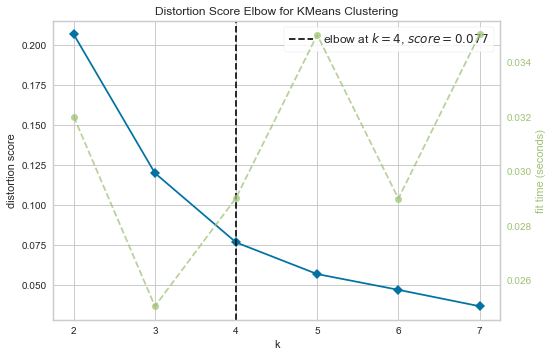

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [126]:
elbow = agirlik.copy()
kmeans_elbow = KMeans()
visualizer = KElbowVisualizer(kmeans_elbow, k = (k_min, k_max))
visualizer.fit(elbow)
print("Elbow Yönteminden K Sayısı: ",visualizer.elbow_value_)
visualizer.poof()

In [127]:
kmeans = KMeans(n_clusters = visualizer.elbow_value_)
k_fit = kmeans.fit(agirlik)
merkezler = k_fit.cluster_centers_
kumeler = k_fit.labels_

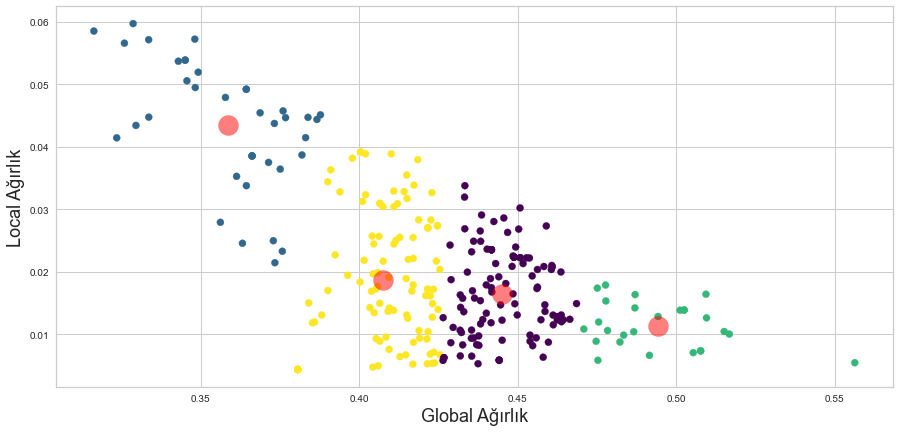

In [128]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(7)
#local - global
plt.scatter(agirlik.iloc[:,1], agirlik.iloc[:,0], c = kumeler, s = 50, cmap = "viridis")
plt.scatter(merkezler[:,1], merkezler[:,0], c = "red", s = 400, alpha = 0.5)
plt.xlabel("Global Ağırlık", fontsize = 18)
plt.ylabel("Local Ağırlık", fontsize = 18)
plt.show()

In [129]:
silhouette_skor = silhouette_score(agirlik, kumeler, metric='euclidean')
silhouette_kesiti = silhouette_samples(agirlik, kumeler, metric='euclidean')
dunn_endeksi = davies_bouldin_score(agirlik, kumeler) * 100

In [130]:
print("Silüet Skoru: ", silhouette_skor)
print("Dunn Endeksi: ", dunn_endeksi)
print("Silüet Kesitleri: ", silhouette_kesiti)

Silüet Skoru:  0.4613917109886235
Dunn Endeksi:  66.24258429097678
Silüet Kesitleri:  [ 0.23925533  0.57706723  0.31419026  0.59808431  0.31419026  0.04282704
  0.42846597  0.42416993  0.70115213  0.50864293  0.59721062  0.50504143
  0.55316103  0.37290103  0.52536931  0.54653223  0.52981671  0.53733344
  0.42458542  0.50088919  0.68007955  0.44430341  0.41993773  0.31954686
  0.44371996  0.6038485   0.60653063  0.43145523  0.57162816  0.58929129
  0.62473399  0.63871772  0.60982325  0.3845447   0.55268588  0.43344483
  0.43984936  0.39651298 -0.0571371   0.58697681  0.6092878   0.45202547
  0.53862333  0.25433067  0.08558307  0.33321462  0.42797665  0.46436739
  0.29549478  0.5831709   0.25044952  0.43579849  0.69103741  0.39962679
  0.60678075  0.66834275  0.31170804  0.61827925  0.18980129  0.06794659
  0.1359238   0.47920577  0.21999542  0.23837666  0.39639701  0.31601669
  0.17551405  0.54429241  0.46891993  0.69592999  0.60653063  0.53468116
  0.67898689  0.18215259  0.11018522  

#### Geometrik Uzaklıklara Göre Özet Çıkarımı

In [131]:
merkezler

array([[0.01650996, 0.44497866],
       [0.04347871, 0.35872694],
       [0.01140013, 0.49424639],
       [0.01862445, 0.4073799 ]])

In [132]:
kumeler

array([3, 3, 3, 0, 3, 3, 0, 1, 0, 0, 3, 3, 3, 3, 1, 3, 0, 2, 3, 3, 0, 1,
       2, 3, 3, 3, 0, 3, 3, 3, 0, 2, 3, 0, 0, 3, 2, 0, 3, 1, 2, 3, 3, 1,
       3, 2, 3, 1, 0, 1, 1, 0, 0, 2, 0, 0, 3, 1, 3, 0, 3, 0, 0, 1, 3, 3,
       3, 0, 3, 0, 0, 3, 2, 0, 0, 1, 3, 0, 3, 2, 3, 0, 3, 0, 0, 3, 3, 0,
       0, 0, 3, 1, 3, 3, 0, 3, 1, 0, 0, 3, 2, 0, 0, 0, 0, 3, 0, 0, 3, 3,
       1, 0, 0, 3, 0, 3, 2, 3, 3, 3, 3, 3, 3, 2, 1, 0, 0, 3, 0, 3, 0, 3,
       0, 1, 0, 3, 3, 2, 0, 3, 1, 3, 0, 3, 0, 0, 1, 0, 0, 3, 0, 2, 3, 0,
       0, 3, 0, 0, 0, 3, 0, 0, 0, 3, 2, 0, 0, 3, 0, 0, 3, 0, 2, 0, 0, 1,
       3, 0, 3, 0, 0, 0, 0, 1, 0, 0, 1, 1, 3, 0, 3, 1, 3, 0, 1, 2, 3, 3,
       0, 0, 1, 2, 0, 0, 0, 0, 2, 3, 3, 1, 0, 3, 2, 3, 3, 2, 3, 3, 1, 0,
       3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 0, 0, 3, 3, 3, 3, 1, 1, 0, 3, 3, 1,
       1, 3, 3, 3, 3, 1, 0, 3, 3, 2, 1, 0, 1, 1, 0, 3, 2, 1, 0, 0, 0, 2,
       2, 0, 2, 0, 3, 3, 0, 3, 1, 0, 0, 3, 1])

In [133]:
agirlik["Class"] = kumeler

In [136]:
uzaklik = []
k = 0
for i in agirlik.index:
    uzaklik.append(math.sqrt(((agirlik["Lij"][i] - merkezler[kumeler[k]][0])**2) + ((agirlik["Gi"][i] - merkezler[kumeler[k]][1])**2)))    
    k += 1
agirlik["Uzaklik"] = uzaklik

In [138]:
agirlik

,Lij,Gi,Class,Uzaklik
D0,0.017211,0.421588,3,0.014278
D1,0.019134,0.409237,3,0.001926
D2,0.004382,0.380573,3,0.030355
D3,0.015387,0.438197,0,0.006874
D4,0.004382,0.380573,3,0.030355
...,...,...,...,...
D272,0.045087,0.387748,1,0.029066
D273,0.027325,0.458976,0,0.017689
D274,0.029077,0.438558,0,0.014113
D275,0.004382,0.380573,3,0.030355


In [159]:
ozet_dokumanlar = []
ozetler = []
for i in range(visualizer.elbow_value_):
    ozet_dokumanlar.append([str(i), 500])
for i in agirlik.index:
    if ozet_dokumanlar[agirlik["Class"][i]][1] > agirlik["Uzaklik"][i]:
        ozet_dokumanlar[agirlik["Class"][i]][1] = agirlik["Uzaklik"][i]
        ozet_dokumanlar[agirlik["Class"][i]][0] = i + "D"
        ozet_dokumanlar[agirlik["Class"][i]][0] = ozet_dokumanlar[agirlik["Class"][i]][0][1:-1]
aij = []
indexler = []
for i in agirlik.index:
    aij.append(agirlik["Lij"][i] * agirlik["Gi"][i])
aij.sort()
for i in agirlik.index:
    if agirlik["Lij"][i] * agirlik["Gi"][i] == aij[len(aij)//2]:
        a = i + "D"
        indexler.append(int(a[1:-1]))
    if agirlik["Lij"][i] * agirlik["Gi"][i] == aij[len(aij)//2 + 1]:
        a = i + "D"
        indexler.append(int(a[1:-1]))
    if agirlik["Lij"][i] * agirlik["Gi"][i] == aij[len(aij)//2 - 1]:
        a = i + "D"
        indexler.append(int(a[1:-1]))
for i in range(len(ozet_dokumanlar)):
    ozetler.append(orijinal_yorumlar[int(ozet_dokumanlar[i][0])][0])
for i in range(len(indexler)):
    ozetler.append(orijinal_yorumlar[indexler[i]])
ozetler

['çok geç teslimat sağlandı soğuk ürün para zaiyati sadece',
 'biraz soğuk geldi sipariş onun dışında güzeldi ',
 'eski tadı yok ',
 'sipariş sıcak ve hızlı geldi.lezzetide 10 üzerinden 10 ustamin ellerine sağlık.',
 ['soğuktu ve lezzetli degildi...'],
 ['çok soğuk ve kuru geldi hava soğuk anlıyorum ama bu kadarda soğuk gelmesin ustad yeme şansımız yoktu çok kurumustu teşekkür ederim....'],
 ['çok güzeldi hamurun kalınlığına güzeldi çok ince olunca güzel olmuyor']]